In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("python/grains.jpg", 1)

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [4]:
gray = np.float32(gray)

In [5]:
harris = cv2.cornerHarris(gray, 2, 3, 0.04)

In [6]:
img[harris>0.01*harris.max()] = [255, 0, 0]

(-0.5, 774.5, 606.5, -0.5)

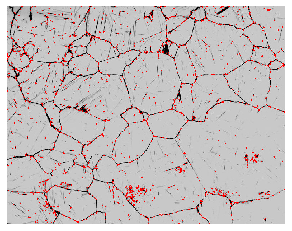

In [7]:
plt.imshow(img)
plt.axis("off")

In [8]:
corners = cv2.goodFeaturesToTrack(gray, 50, 0.01, 10)
corners = np.int0(corners)

In [22]:
for i in corners:
    x, y = i.ravel()
    cv2.circle(img, (x, y), 3, 255, -1)

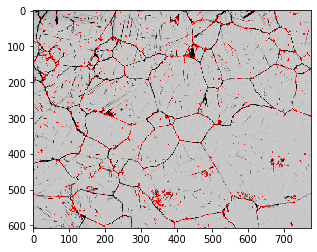

In [10]:
plt.imshow(img, cmap="gray")

In [11]:
detector = cv2.FastFeatureDetector_create(50)

In [12]:
kp = detector.detect(img, None)

In [13]:
img2 = cv2.drawKeypoints(img, kp, None, flags=0)

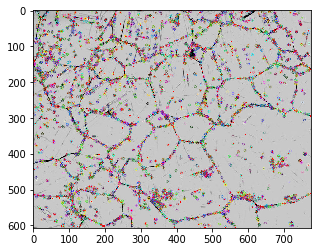

In [14]:
plt.imshow(img2)

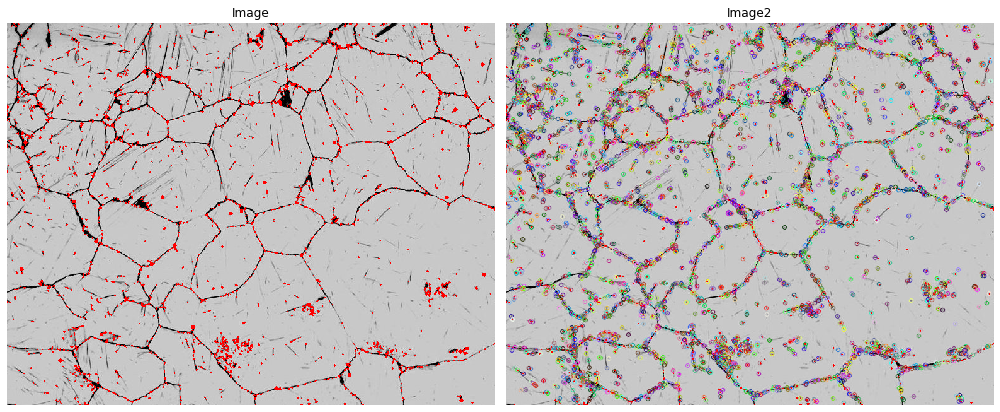

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(14, 14))

ax = axes.ravel()

ax[0].imshow(img)
ax[0].set_title("Image")

ax[1].imshow(img2)
ax[1].set_title("Image2")

for x in ax:
    x.axis("off")
    
plt.tight_layout()
plt.show()

In [16]:
orb = cv2.ORB_create(50)

In [17]:
kps, des = orb.detectAndCompute(img, None)

In [20]:
img3 = cv2.drawKeypoints(img, kps, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

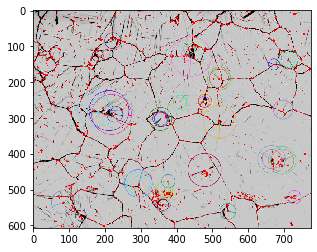

In [21]:
plt.imshow(img3)